# 1. DATA IMPORTATION AND LOADING

In [3]:
import pandas as pd #importing pandas library
import matplotlib.pyplot as plt
df=pd.read_csv('tmdb.movies.csv', index_col=0) #loading data

# 2. DATA EXPLORATION

In [4]:
df.head()

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788
1,"[14, 12, 16, 10751]",10191,en,How to Train Your Dragon,28.734,2010-03-26,How to Train Your Dragon,7.7,7610
2,"[12, 28, 878]",10138,en,Iron Man 2,28.515,2010-05-07,Iron Man 2,6.8,12368
3,"[16, 35, 10751]",862,en,Toy Story,28.005,1995-11-22,Toy Story,7.9,10174
4,"[28, 878, 12]",27205,en,Inception,27.920,2010-07-16,Inception,8.3,22186


In [9]:
df.columns

Index(['genre_ids', 'id', 'original_language', 'original_title', 'popularity',
       'release_date', 'title', 'vote_average', 'vote_count'],
      dtype='object')

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 26517 entries, 0 to 26516
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   genre_ids          26517 non-null  object 
 1   id                 26517 non-null  int64  
 2   original_language  26517 non-null  object 
 3   original_title     26517 non-null  object 
 4   popularity         26517 non-null  float64
 5   release_date       26517 non-null  object 
 6   title              26517 non-null  object 
 7   vote_average       26517 non-null  float64
 8   vote_count         26517 non-null  int64  
dtypes: float64(2), int64(2), object(5)
memory usage: 2.0+ MB


In [11]:
df.describe()

,id,popularity,vote_average,vote_count
count,26517.000000,26517.000000,26517.000000,26517.000000
mean,295050.153260,3.130912,5.991281,194.224837
std,153661.615648,4.355229,1.852946,960.961095
min,27.000000,0.600000,0.000000,1.000000
25%,157851.000000,0.600000,5.000000,2.000000
50%,309581.000000,1.374000,6.000000,5.000000
75%,419542.000000,3.694000,7.000000,28.000000
max,608444.000000,80.773000,10.000000,22186.000000


In [12]:
#Checking for null values
df.isnull().sum()

genre_ids            0
id                   0
original_language    0
original_title       0
popularity           0
release_date         0
title                0
vote_average         0
vote_count           0
dtype: int64

# 3. EXPLORATOTY DATA ANALYSIS

### Code to determine the most popular movies

In [13]:
#to determine the most popular movies
popular_movies= df.sort_values(by='popularity', ascending=False)
top_100_popular_movies = popular_movies[['original_title', 'popularity']].head(10)
top_100_popular_movies


,original_title,popularity
23811,Avengers: Infinity War,80.773
11019,John Wick,78.123
23812,Spider-Man: Into the Spider-Verse,60.534
11020,The Hobbit: The Battle of the Five Armies,53.783
5179,The Avengers,50.289
11021,Guardians of the Galaxy,49.606
20617,Blade Runner 2049,48.571
23813,Blade Runner 2049,48.571
23814,Fantastic Beasts: The Crimes of Grindelwald,48.508
23815,Ralph Breaks the Internet,48.057


### Code to determine the most popular language in the top movies


In [82]:

top_100_popular_movies = popular_movies[['original_title', 'original_language']].head(100)

most_popular_language = top_100_popular_movies['original_language'].mode().values[0]

most_popular_language

'en'

# 4. DATA VISUALIZATION

In [20]:
df.head(1)

,genre_ids,id,original_language,original_title,popularity,release_date,title,vote_average,vote_count
0,"[12, 14, 10751]",12444,en,Harry Potter and the Deathly Hallows: Part 1,33.533,2010-11-19,Harry Potter and the Deathly Hallows: Part 1,7.7,10788


In [30]:
# Convert any non-list values in 'genre_ids' to strings for filtering
df['genre_ids'] = df['genre_ids'].astype(str)

# Filter out rows with blank lists in 'genre_ids'
df_non_blank = df[df['genre_ids'] != '[]']


Text(0.5, 0, 'count of genre_ids')

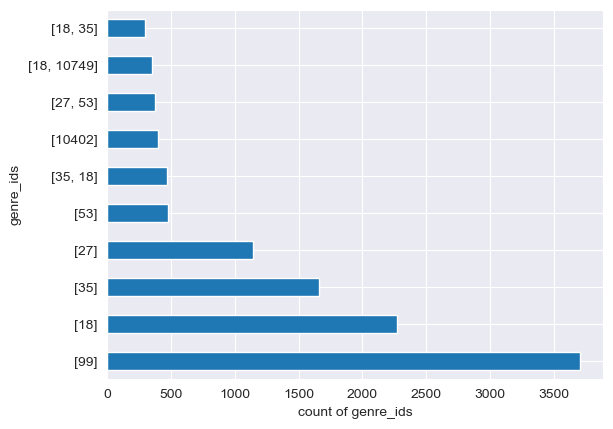

In [31]:
#visualizing number of genres
genre_counts = df_non_blank.explode('genre_ids').groupby('genre_ids')['genre_ids'].size()

# Sort the genres by count in descending order
genre_counts_sorted = genre_counts.sort_values(ascending=False).head(10)
genre_counts_sorted.plot(kind = 'barh')
plt.xlabel('count of genre_ids')

<Axes: ylabel='genre_ids'>

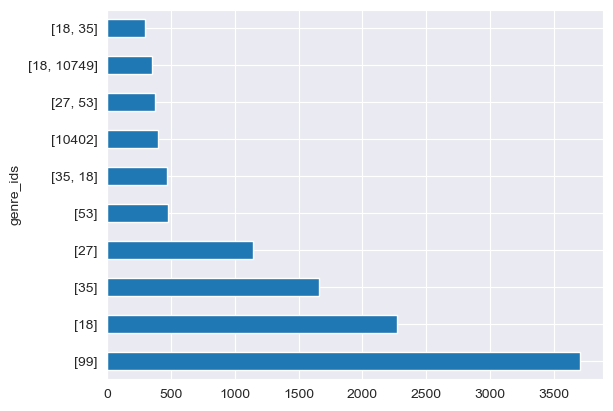

In [32]:
sns.set_style("darkgrid")
genre_grouped = df_non_blank.groupby(df_non_blank['genre_ids'])['genre_ids'].count().sort_values(ascending=False)
genre_grouped.head(10).plot(kind = 'barh')

In [33]:
# Exploring the genres and performance of movies
genre_performance = df_non_blank[['genre_ids', 'popularity', 'vote_average', 'vote_count']]
#view sample data for genre performance
genre_performance.head()

,genre_ids,popularity,vote_average,vote_count
0,"[12, 14, 10751]",33.533,7.7,10788
1,"[14, 12, 16, 10751]",28.734,7.7,7610
2,"[12, 28, 878]",28.515,6.8,12368
3,"[16, 35, 10751]",28.005,7.9,10174
4,"[28, 878, 12]",27.920,8.3,22186


### 1.Movie genre by popularity

<Axes: ylabel='genre_ids'>

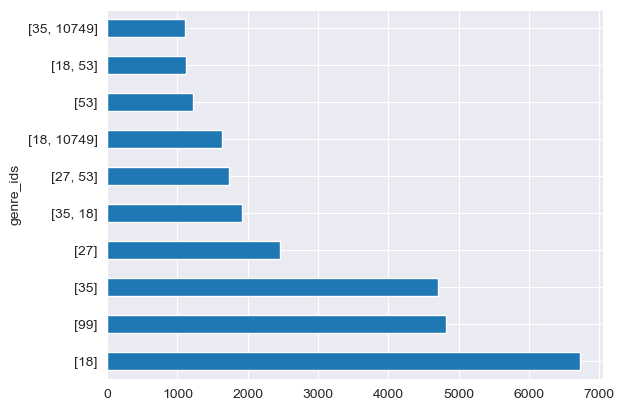

In [34]:
# extracting genres and their average popularity
#he explode() function in Pandas, we flatten the list of genre IDs to count each genre separately; 
#This creates separate rows for each movie-genre combination.
average_popularity_by_genre = genre_performance.explode('genre_ids').groupby('genre_ids')['popularity'].sum().sort_values(ascending=False)
average_popularity_by_genre.head(10).plot(kind= 'barh')


### 2. Movie genre by vote average

<Axes: ylabel='genre_ids'>

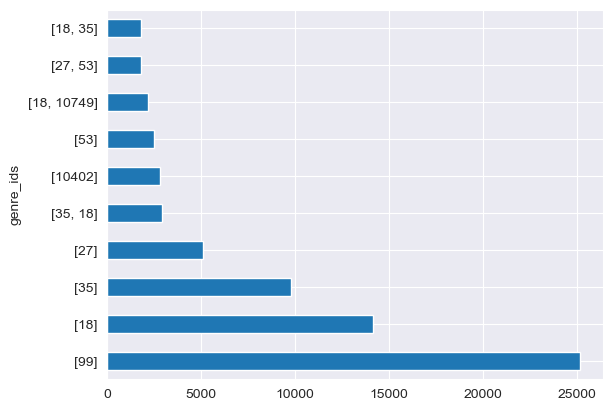

In [35]:
# extracting genres and their vote average
vote_average_by_genre = genre_performance.explode('genre_ids').groupby('genre_ids')['vote_average'].sum().sort_values(ascending=False)
vote_average_by_genre.head(10).plot(kind= 'barh')

### 3. Movie genre by vote count

<Axes: ylabel='genre_ids'>

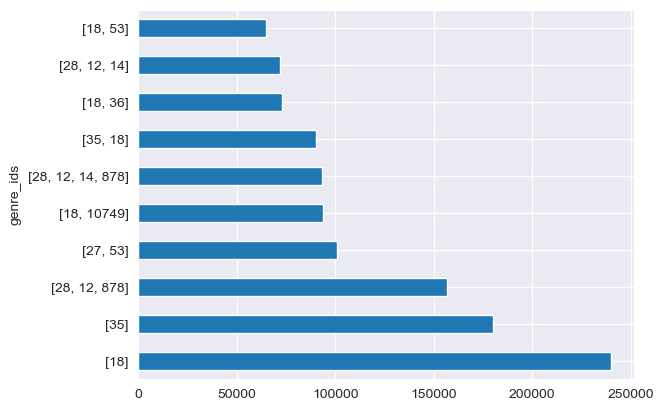

In [36]:
vote_count_by_genre = genre_performance.explode('genre_ids').groupby('genre_ids')['vote_count'].sum().sort_values(ascending=False)
vote_count_by_genre.head(10).plot(kind= 'barh')

### 4. Time Trends and Box Office Success

Text(0, 0.5, 'Total Vote Count Per Movie')

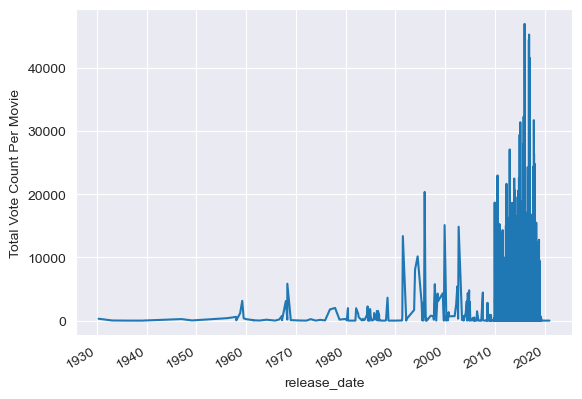

In [77]:
# :
sns.set_style("darkgrid")
# Convert 'release_date' to datetime
df['release_date'] = pd.to_datetime(['release_date'])

# Analyzing box office performance over time
time_trends = df[['release_date', 'popularity', 'vote_count']]

# For example, examining the trend of vote count over time
vote_count_trend = time_trends.groupby('release_date')['vote_count'].sum().plot()
plt.ylabel('Total Vote Count Per Movie')